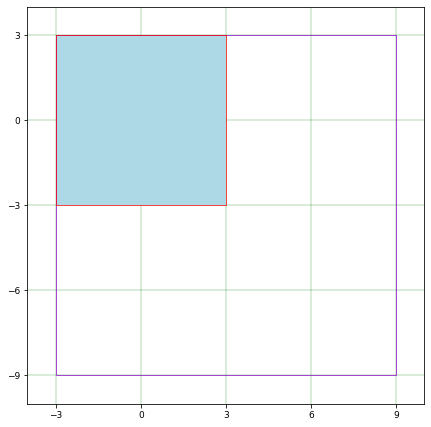

In [1]:
# 程式碼A區==程式碼A區==程式碼A區==程式碼A區==程式碼A區
# AAAAAAAA==AAAAAAAA==AAAAAAAAA==AAAAAAAA==AAAAAAAA
#
# tile-A-0
# 2021-09-17
#
# python 3.8
# run on https://replit.com
# run on ubuntu 16.04 LTS
#
# 要執行本程式, 請按上方run▶
#
# Browser encoding UTF-8 HTML5 URL / as %2F
#
# 4 Fold pattern
#
# 程式碼B區==程式碼B區==程式碼B區==程式碼B區==程式碼B區
# BBBBBBBB==BBBBBBBB==BBBBBBBBB==BBBBBBBB==BBBBBBBB
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plot
import numpy as np
from shapely.geometry  import LineString
#
# 定義圖面函數 ------------------------------------------------------
def set_graphic_area(width,height) :
    #    
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
# Define the arc
# center position is cxy = (cx, cy)
# start_angle, end_angle is in degrees
#
def shapely_Arc(cxy, r, start_angle, end_angle) :
    #
    numsegments = 1440
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
    #
# end of def
#
def motif_line(LS, COLOR, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=COLOR, alpha=0.7, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, COLOR, ZORDER, ALPHA) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=ALPHA, closed=True, edgecolor=None, facecolor=COLOR, fill=True, joinstyle='miter', zorder=ZORDER)
    return
#
# 程式碼C區==程式碼C區==程式碼C區==程式碼C區==程式碼C區
# CCCCCCCC==CCCCCCCC==CCCCCCCCC==CCCCCCCC==CCCCCCCC
#
# 設定圖面大小
#  setup圖面大小 (14,14) 單位公分
#  tup7 is type of Tuple, have 7 indexed value
#
# main()
tup7 = set_graphic_area(14,14)  
# 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
fig = plot.figure(figsize=(tup7[0], tup7[1])) 
# 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
ax = fig.add_subplot(1,1,1)   
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plot.xlim(-4, 10)    # 設定X軸的顯示範圍, from xmin to xmax
plot.ylim(-10, 4)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-3,0,3,6,9]
yvalues = [-9,-6,-3,0,3]
plot.xticks(xvalues)
plot.yticks(yvalues)
plot.tick_params(labelsize=9)
#
# get current axes, set X,Y same ratio & scale 
plot.gca().set_aspect('equal', adjustable='box')
#
plot.grid(color='green', linewidth=0.3)
ax.grid(True)
# ax.grid(False)
ax.set_axis_on() # will turn on  grid line
# ax.set_axis_off()  # will turn off grid line
#
y1 = ( 3, 3)
y2 = (-3, 3)
y3 = (-3,-3)
y4 = ( 3,-3)
#
z1 = ( 9, 3)
z2 = (-3, 3)
z3 = (-3,-9)
z4 = ( 9,-9)
#
base_xy = [y1,y2,y3,y4,y1]
base = LineString(base_xy)
motif_line(base, 'red', 40, 1)
motif_fill(base, 'lightblue', 30, 1)
#
motif_xy = [z1,z2,z3,z4,z1]
motif = LineString(motif_xy)
motif_line(motif, 'darkviolet', 30, 1)
#
plot.savefig("./png/A-0.png", format="png", dpi=150)
#